In [1]:
import gc
gc.collect()
import numpy as np
import pandas as pd
import os

In [2]:
#Display classes
fpath="D:\BE Project\images\Images"
print(os.listdir(fpath))
dog_classes = os.listdir(fpath)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [3]:
#get dog labels
breeds = [breed.split('-',1)[1] for breed in dog_classes]
breeds[:10]

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound']

In [4]:
# Get images full path and their labels
from itertools import chain 
X = [] # Full address of each image
y = [] # breed name
fullpaths = ['D:\BE Project\images\Images\{}'.format(dog_class) for dog_class in dog_classes]
for counter,fullpath in enumerate(fullpaths):
    for imgname in os.listdir(fullpath):
        X.append([fullpath + '\\' + imgname])
        y.append(breeds[counter])
print(X[:10],"\n")
print(y[:10],"\n")
X = list(chain.from_iterable(X))
print(X[:10],"\n")
len(X)

[['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10074.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10131.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10621.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_1073.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10976.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11140.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11238.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11258.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11337.jpg'], ['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11477.jpg']] 

['Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua'] 

['D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10074.jpg', 'D:\\BE 

20580

In [5]:
#Random shuffle of images
import random 
combined = list(zip(X,y))
print(combined[:10],"\n")
random.shuffle(combined)
print(combined[:10],"\n")
X[:],y[:]= zip(*combined)

[('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10074.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10131.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10621.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_1073.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_10976.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11140.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11238.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11258.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11337.jpg', 'Chihuahua'), ('D:\\BE Project\\images\\Images\\n02085620-Chihuahua\\n02085620_11477.jpg', 'Chihuahua')] 

[('D:\\BE Project\\images\\Images\\n02099849-Chesapeake_Bay_retriever\\n02099849_2153.jp

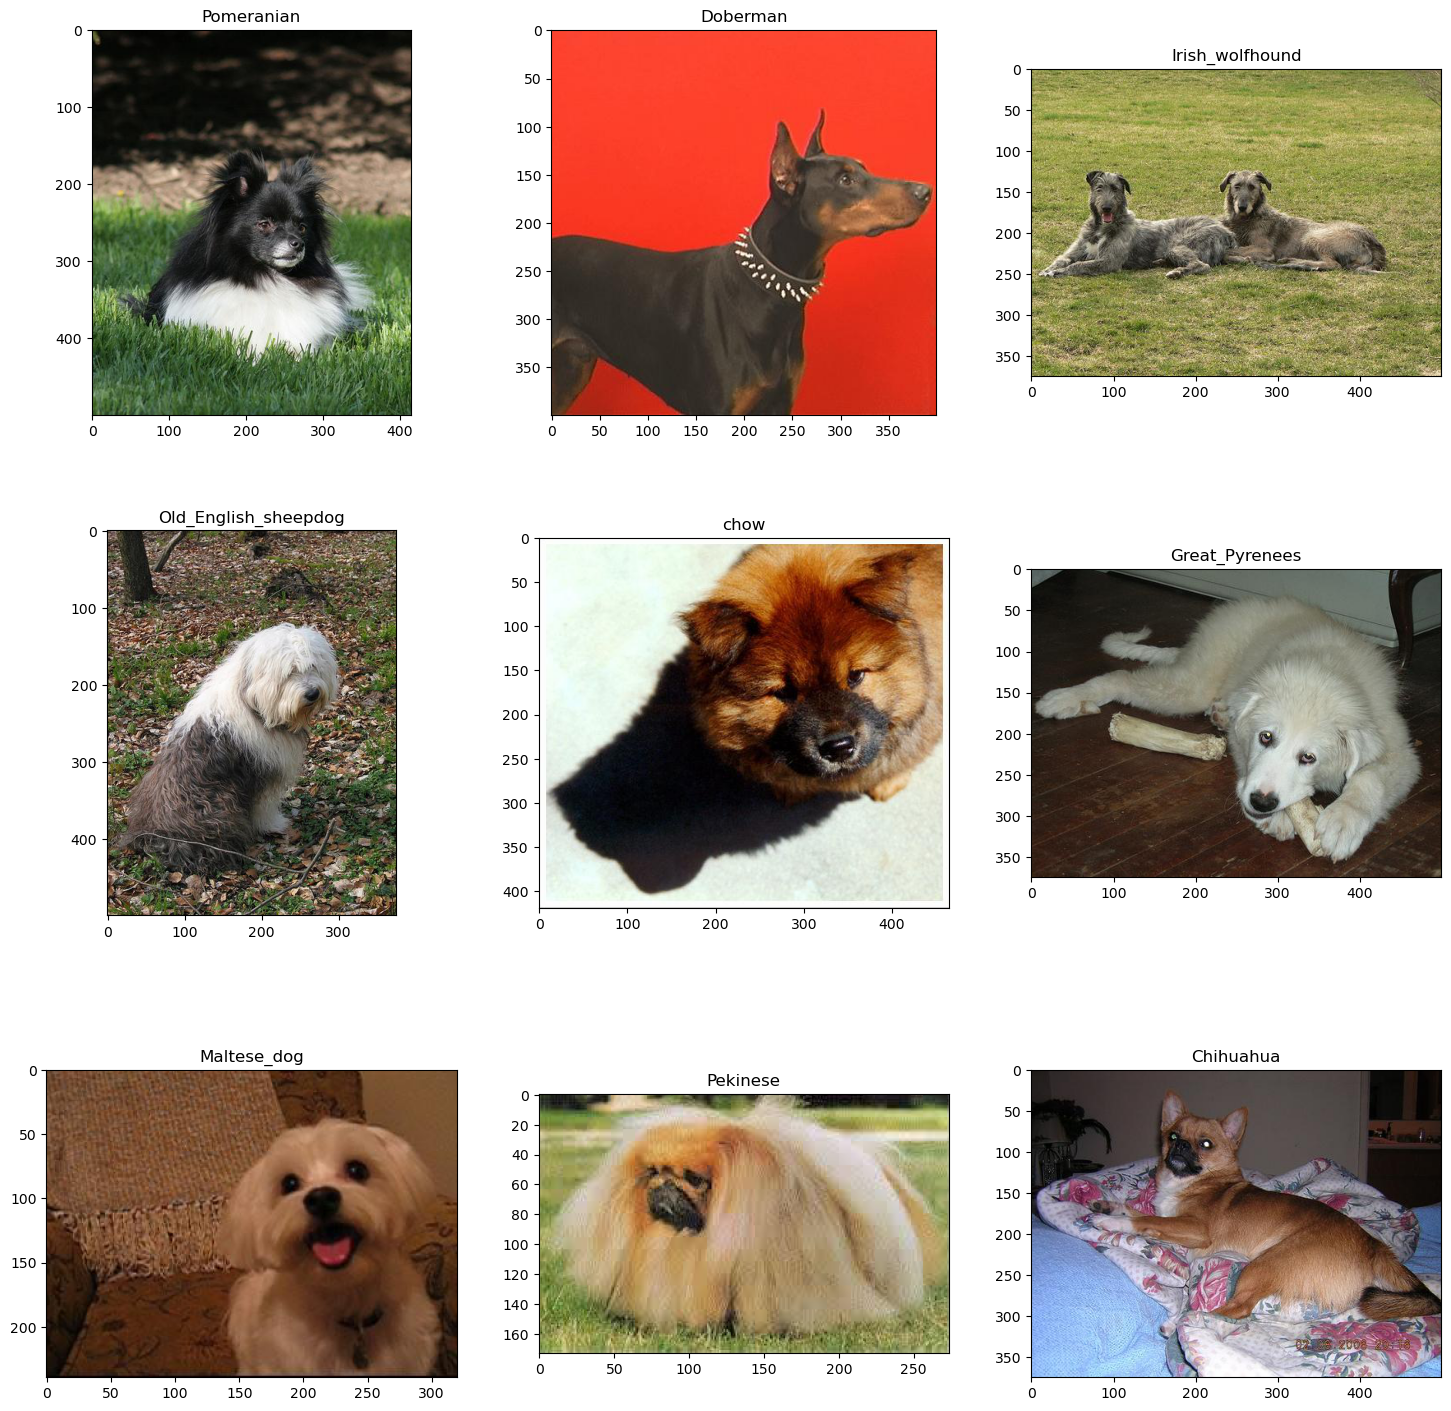

In [6]:
#Display random dogs picture
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread 
plt.figure(figsize= (18,18))
for counter , i in enumerate(random.sample(range(0,len(X)),9)):
    plt.subplot(3,3, counter + 1)
    plt.subplots_adjust(hspace = 0.3)
    filename = X[i]
    image = imread(filename)
    plt.imshow(image)
    plt.title(y[i],fontsize = 12)
plt.show()


In [7]:
X = X[:1000]
y = y[:1000]

In [8]:
#Convert lables to one hot encoded labels
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical 
le = LabelEncoder()
le.fit(y)
y_ohe = to_categorical(le.transform(y),len(breeds))
print(y_ohe.shape)
y_ohe = np.array(y_ohe)

(1000, 120)


In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array, load_img


#from keras.preprocessing.image import img_to_array,load_img
#Load, resize images and store as array
img_data=np.array([img_to_array(load_img(img,target_size=(299,299))) for img in X])
print(img_data.shape)
# 20% of 1000 is 200
x_train,x_test,y_train,y_test = train_test_split(img_data, y_ohe, test_size = 0.2, random_state = 2)
# 20% of 800 is 160
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state = 2)

print("training dataset size: ",x_train.shape)
print("validation dataset size: ",x_val.shape)
print("Testing dataset size: ",x_test.shape)
print("Training label size: ",y_train.shape)
print("Validation label size: ",y_val.shape)
print("Testing label size: ",y_test.shape)

# clear some space from memory
import gc
del img_data
gc.collect()


(1000, 299, 299, 3)
training dataset size:  (640, 299, 299, 3)
validation dataset size:  (160, 299, 299, 3)
Testing dataset size:  (200, 299, 299, 3)
Training label size:  (640, 120)
Validation label size:  (160, 120)
Testing label size:  (200, 120)


0

In [10]:
# Data Augmentation
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
batch_size=32

#Create train generator
#using only preprocess_input because using pretrained models use rescale=1./255 if trained from scratch
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True)
train_generator=train_datagen.flow(x_train,y_train, 
                                  shuffle=False, batch_size=batch_size,seed=1)

# Create validation generator
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=val_datagen.flow(x_val,y_val,
                              shuffle=False,batch_size=batch_size,seed=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


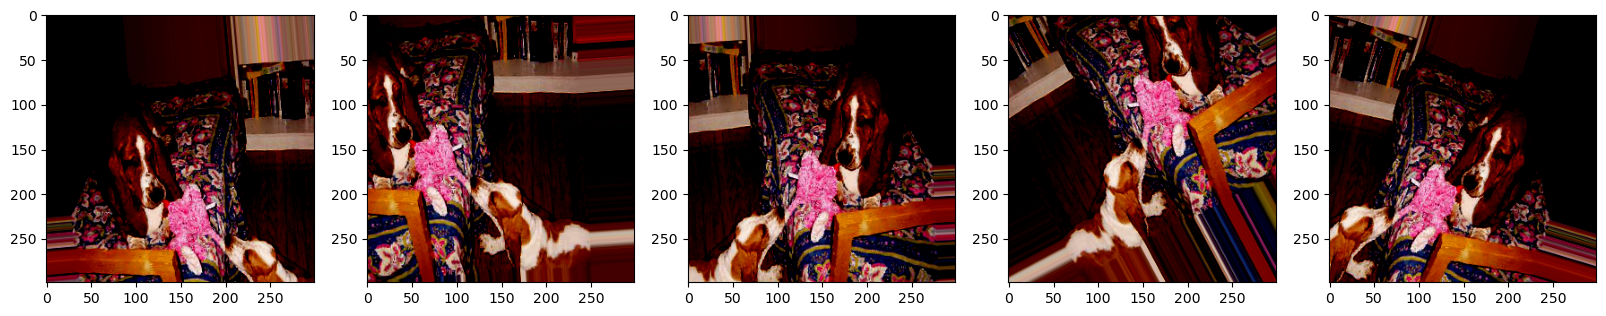

In [11]:
img_id=2
dog_generator=train_datagen.flow(x_train[img_id:img_id+1],y_train[img_id:img_id+1],
                                  shuffle=False, batch_size=batch_size,seed=1)
plt.figure(figsize=(20,20))
dogs=[next(dog_generator) for i in range(0,5)]
for counter, dog in enumerate(dogs):
    plt.subplot(1,5,counter+1)
    plt.imshow(dog[0][0])
plt.show()
                                


In [12]:
#Build model using pre_trained model
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

#Load InceptionV3 pre_trained model
base_model=InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))

model=models.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(len(breeds), activation='softmax'))

print('Number of trainable weights before freezing the base layer:' ,len(model.trainable_weights))
model.layers[0].trainable=False
print('Number of trainable weights after freezing the base layer:' ,len(model.trainable_weights))


Number of trainable weights before freezing the base layer: 194
Number of trainable weights after freezing the base layer: 6


In [13]:
#Compile the model
model.compile(Adam(lr=.0001), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 120)               61560     
                                                        

C:\Users\Pranita0501\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


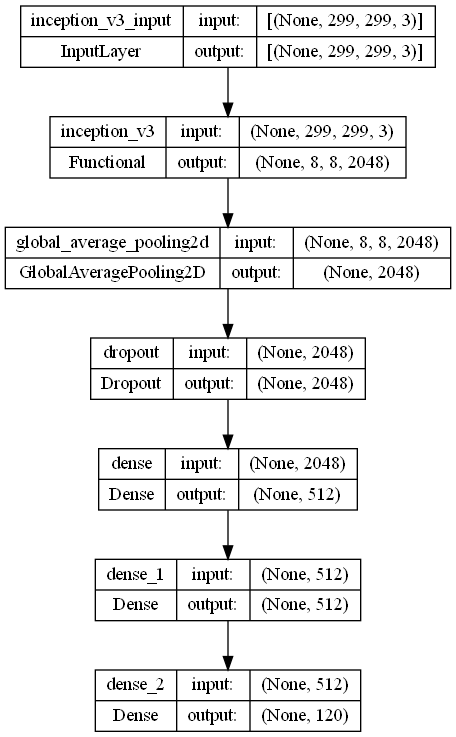

In [14]:
import pydot_ng as pydot
pydot.find_graphviz()
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

In [15]:
#Train model
train_steps_per_epoch=x_train.shape[0] // batch_size
val_steps_per_epoch=x_val.shape[0] // batch_size
epochs=20

history=model.fit_generator(train_generator,
                           steps_per_epoch=train_steps_per_epoch,
                           validation_data=val_generator,
                           validation_steps=val_steps_per_epoch,
                           epochs=epochs,verbose=1)

C:\Users\Pranita0501\AppData\Local\Temp\ipykernel_6964\1944406297.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


Epoch 1/20
20/20 [==============================] - 72s 3s/step - loss: 4.8041 - accuracy: 0.0141 - val_loss: 4.5938 - val_accuracy: 0.0625
Epoch 2/20
20/20 [==============================] - 71s 4s/step - loss: 4.5617 - accuracy: 0.0531 - val_loss: 4.4242 - val_accuracy: 0.1375
Epoch 3/20
20/20 [==============================] - 72s 4s/step - loss: 4.3390 - accuracy: 0.1453 - val_loss: 4.2049 - val_accuracy: 0.3438
Epoch 4/20
20/20 [==============================] - 75s 4s/step - loss: 4.0651 - accuracy: 0.2578 - val_loss: 3.9351 - val_accuracy: 0.3750
Epoch 5/20
20/20 [==============================] - 76s 4s/step - loss: 3.7140 - accuracy: 0.3438 - val_loss: 3.5831 - val_accuracy: 0.4500
Epoch 6/20
20/20 [==============================] - 80s 4s/step - loss: 3.2971 - accuracy: 0.4766 - val_loss: 3.1469 - val_accuracy: 0.5375
Epoch 7/20
20/20 [==============================] - 78s 4s/step - loss: 2.8188 - accuracy: 0.5500 - val_loss: 2.7177 - val_accuracy: 0.5938
Epoch 8/20
20/20 [==

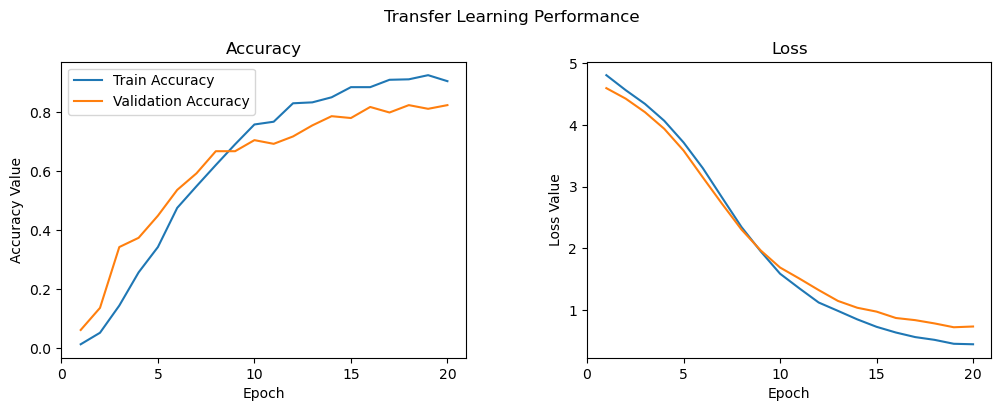

In [16]:
#Plot accuracy and loss
f,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
t=f.suptitle('Transfer Learning Performance',fontsize=12)
f.subplots_adjust(top=0.85,wspace=0.3)

epoch_list=list(range(1,epochs+1))
ax1.plot(epoch_list,history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(0,epochs+1,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1=ax1.legend(loc="best")

ax2.plot(epoch_list,history.history['loss'],label='Train Loss')
ax2.plot(epoch_list,history.history['val_loss'],label='Validation Loss')
ax2.set_xticks(np.arange(0,epochs+1,5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2=ax1.legend(loc="best")


In [17]:
#evaluate the model
x_test1 = x_test/255.
test_predictions = model.predict(x_test1)
#get model prediction
predictions = le.classes_[np.argmax(test_predictions,axis = 1)]
#get target labels
target_labels = le.classes_[np.argmax(y_test,axis =1)]
predict_df = pd.DataFrame({'Targect_Labels': target_labels , 'Predictions' : predictions})
predict_df.head(20)


7/7 [==============================] - 18s 2s/step


,Targect_Labels,Predictions
0,English_foxhound,English_foxhound
1,Sussex_spaniel,Sussex_spaniel
2,Pembroke,Pembroke
3,Sealyham_terrier,Sealyham_terrier
4,Great_Dane,Great_Dane
5,English_foxhound,English_foxhound
6,Airedale,Airedale
7,Irish_wolfhound,Irish_wolfhound
8,flat-coated_retriever,flat-coated_retriever
9,Appenzeller,basenji


In [18]:
# Get accuracy measure
correct = (target_labels == predictions)
accuracy = correct.sum() / correct.size
print(accuracy)


0.755


In [19]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

In [20]:

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



In [21]:
# Evaluate model performance
get_metrics(true_labels = target_labels , 
                       predicted_labels = predictions)

Accuracy: 0.755
Precision: 0.7573
Recall: 0.755
F1 Score: 0.7343


C:\Users\Pranita0501\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranita0501\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
error=1-accuracy
print("Error rate is",error)

Error rate is 0.245
